In [2]:
using TiSR
using Symbolics
using SymbolicUtils
using CSV
using DataFrames
using Statistics
import DynamicQuantities: uparse,  @u_str


In [2]:
phi = "005"
run = 0

exp_name = "finalStokes"

dataset_prefix = "./data/thirtyParticles"

arbitrary_name = "Re0_phi$(phi)_n30_symmetricRotation_dimensionless"


data_matrix = Matrix(CSV.read("$(dataset_prefix)/$(arbitrary_name)_val.csv", DataFrame))
data_matrix = data_matrix[:, [1,2,3,7,8]]
units = [u"m",  u"0", u"0", u"N", u"0"]

time = 60 * 120.0

always_correct_dims = false
p_correct_dims = 0.0
death_penalty_dims = false
hall_of_fame_objectives = [:ms_processed_e, :dim_penalty, :custom_compl]
selection_objectives = [:ms_processed_e, :minus_spearman, :dim_penalty, :custom_compl]

# ==================================================================================================
# preparation
# ==================================================================================================

train_part = size(data_matrix,1)
train_configs = round(train_part/30 * 0.5)
parts_1 = train_configs*30 / train_part 
parts_2 = 1 - parts_1

parts = [1.0, 0.0]
p_binops_        = (1.0, 1.0, 1.0, 1.0, 1.0)  # -> probabilites for selection of each binary functions (same length as provided binops) (dont need to add up to 1, adjusted accordingly)
p_unaops_        = (1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0)  # -> probability for each unary function
n_gen = 150
# ==================================================================================================
# options -> specify some custom settings, where the default setting is unsatisfactory
# ==================================================================================================
pow_abs(v1, v2) = abs(v1)^v2
sqrt_abs(v1) = sqrt(abs(v1))
pow2(v1) = v1^2
pow3(v1) = v1^3

ops, data = Options(
    data_descript=data_descript(
        data_matrix;
        arbitrary_name = arbitrary_name,
        parts          = parts,
        #fit_weights    = fit_weights, 
        units          = units,
    ),
    general=general_params(
        n_gens                  = n_gen,
        pop_size                = 500,
        max_compl               = 35,
        pow_abs_param           = true,
        prevent_doubles         = 1e-7,
        t_lim                   = typemax(Float64),
        multithreadding         = true,
        always_correct_dims     = always_correct_dims,
        death_penalty_dims      = death_penalty_dims,
        always_drastic_simplify = false,
    ),
    selection=selection_params(
        hall_of_fame_objectives           = hall_of_fame_objectives,          # -> objectives for the hall_of_fame
        selection_objectives              = selection_objectives              # -> objectives for the Pareto-optimal selection part of selection
    ),
    fitting=fitting_params(
        early_stop_iter = 5,
        max_iter        = 30,
        pre_residual_processing = nothing,),

        binops          = (  +,   -,   *,   /,  ^),  # -> binary function set to choose from
        p_binops        = p_binops_,  # -> probabilites for selection of each binary functions (same length as provided binops) (dont need to add up to 1, adjusted accordingly)
        unaops          = (exp, log, sin, cos, abs, sqrt_abs, pow2, pow3),  # -> unary function set to choose from
        p_unaops        = p_unaops_,  # -> probability for each unary function
        illegal_dict = Dict(:sin => (sin, cos),
                        :cos => (sin, cos),
                        :abs => (abs,),
                        :exp => (exp, sqrt_abs), #log
                        :log => (log,), #exp
                        :pow2 => (log, sqrt_abs),
                        :sqrt_abs => (sqrt_abs,),
                        :pow3 => (pow3, pow2),
                        :^ => (^,),),

    mutation=mutation_params(;
        p_crossover        = 4.0,
        p_point            = 0.5,
        p_innergrow        = 0.0,
        p_insert           = 0.2,
        p_hoist            = 0.2,
        p_subtree          = 0.2,
        p_add_term         = 0.1,
        p_simplify         = 0.5,
        p_drastic_simplify = 0.5,
        p_correct_dims     = p_correct_dims,),
);

[452880, 452880]

┌ Warning: ^ is only valid for positive bases. Otherwise provide a pow(abs(x), y) function with its own drawbacks.
└ @ TiSR /Users/juliareu/GitCode/TiSR/src/options.jl:39


In [3]:
df_all = DataFrame(phi = String[], run = Int[], eq = Int[], eqs = String[], r2 = Float64[], mse = Float64[], compl = Int[], n_param = Int[])
df_top3 = DataFrame(phi = String[], run = Int[], eq = Int[], eqs = String[], r2 = Float64[], mse = Float64[], compl = Int[], n_param = Int[])
for phi in ["005","01","02","03","04"]
    arbitrary_name = "Re0_phi$(phi)_n30_symmetricRotation_dimensionless"
    data_matrix = Matrix(CSV.read("$(dataset_prefix)/$(arbitrary_name)_val.csv", DataFrame))
    data_matrix = data_matrix[:, [1,2,3,7,8]]
    units = [u"m",  u"0", u"0", u"N", u"0"]

    ops, data = Options(
    data_descript=data_descript(
            data_matrix;
            arbitrary_name = arbitrary_name,
            parts          = parts,
            #fit_weights    = fit_weights, 
            units          = units,
        ),
        general=general_params(
            n_gens                  = n_gen,
            pop_size                = 500,
            max_compl               = 35,
            pow_abs_param           = true,
            prevent_doubles         = 1e-7,
            t_lim                   = typemax(Float64),
            multithreadding         = true,
            always_correct_dims     = always_correct_dims,
            death_penalty_dims      = death_penalty_dims,
            always_drastic_simplify = false,
        ),
        selection=selection_params(
            hall_of_fame_objectives           = hall_of_fame_objectives,          # -> objectives for the hall_of_fame
            selection_objectives              = selection_objectives              # -> objectives for the Pareto-optimal selection part of selection
        ),
        fitting=fitting_params(
            early_stop_iter = 5,
            max_iter        = 30,
            pre_residual_processing = nothing,),

            binops          = (  +,   -,   *,   /,  ^),  # -> binary function set to choose from
            p_binops        = p_binops_,  # -> probabilites for selection of each binary functions (same length as provided binops) (dont need to add up to 1, adjusted accordingly)
            unaops          = (exp, log, sin, cos, abs, sqrt_abs, pow2, pow3),  # -> unary function set to choose from
            p_unaops        = p_unaops_,  # -> probability for each unary function
            illegal_dict = Dict(:sin => (sin, cos),
                            :cos => (sin, cos),
                            :abs => (abs,),
                            :exp => (exp, sqrt_abs), #log
                            :log => (log,), #exp
                            :pow2 => (log, sqrt_abs),
                            :sqrt_abs => (sqrt_abs,),
                            :pow3 => (pow3, pow2),
                            :^ => (^,),),

        mutation=mutation_params(;
            p_crossover        = 4.0,
            p_point            = 0.5,
            p_innergrow        = 0.0,
            p_insert           = 0.2,
            p_hoist            = 0.2,
            p_subtree          = 0.2,
            p_add_term         = 0.1,
            p_simplify         = 0.5,
            p_drastic_simplify = 0.5,
            p_correct_dims     = p_correct_dims,),
    );
    y = data[end]
    #select every thirtieth element of y    
    y = [y[i] for i in 1:30:length(y)-1]
    println("phi: $phi")
    println(length(y))
    for run in 0:30
        println("run: $run")
        arbitrary_name_ = "Re0_phi$(phi)_n30_symmetricRotation_dimensionless_run$run"

        df = CSV.read("finalStokes/$(arbitrary_name_)/$(arbitrary_name_)_hall_of_fame.csv", DataFrame)
        #filter df for dim_penalty=0
        df = df[df[!,"dim_penalty"] .== 0,:]
        #df = df[df[!,"minus_r2"] .< -0.5,:]
        eqs = df[!,"eqs_orig"]
        df_tmp = DataFrame(phi = String[], run = Int[], eq = Int[], eqs = String[], r2 = Float64[], mse = Float64[], compl = Int[], n_param = Int[])
        for (i, eq) in enumerate(eqs)
            #println(i)
            #replace -- in eq with +
            eq = replace(eq, r"--" => "+")
            println(eq)
            parsed = TiSR.string_to_node(eq, ops)
            compl_notsimp = compl = TiSR.custom_compl(parsed, ops)
            #try to simplify the equation
            try
                TiSR.simplify_w_symbolic_utils!(parsed, ops, though_polyform=false)
                if (TiSR.custom_compl(parsed, ops)-4) > compl_notsimp
                    compl = compl_notsimp
                    println(parsed)
                    parsed = TiSR.string_to_node(eq, ops) 
                    println(parsed) 
                end
            catch
                println("simplify failed")
                #go to next equation
                continue
            end
            n_param = length(TiSR.list_of_param_nodes(parsed))
            #node = TiSR.simplify_w_symbolic_utils!(parsed, ops)
            #compute output of parsed with data as input
            pred, valid = TiSR.eval_equation(parsed, data[1:end-2], ops)
            pred = [sum(pred[i:i+29]) for i in 1:30:length(pred)-1]
            residual = y .- pred
            compl = TiSR.custom_compl(parsed, ops)
            #println(-TiSR.r_squared(y .- residual, y))
            #add results to data frame df_all
            eq = replace(eq, r"v1" => "r")
            eq = replace(eq, r"v2" => "theta")
            eq = replace(eq, r"v3" => "phi")
            push!(df_all, (phi, run, i, eq, -TiSR.r_squared(y .- residual, y), mean(abs2,residual), compl, n_param))
            push!(df_tmp, (phi, run, i, eq, -TiSR.r_squared(y .- residual, y), mean(abs2,residual), compl, n_param))
        end
        #minimum of r2
        if size(df_tmp, 1) == 0
            continue
        end
        min_r2 = minimum(df_tmp[!,"r2"])
        selected = df_tmp[df_tmp[!,"r2"].<=(0.95*min_r2),:]
        #select the three equations with the lowest custom_compl
        sorted = sort(selected, :compl)
        selected = sorted
        #check if length is 3 or larger, if smaller select all
        len = min(size(selected, 1), 3)
        for i in 1:len
            push!(df_top3, (phi, run, i, selected[i,:eqs], selected[i,:r2], selected[i,:mse], selected[i,:compl], selected[i,:n_param]))
        end
    end
end

[452880, 452880]phi: 005
15096
run: 0


┌ Warning: ^ is only valid for positive bases. Otherwise provide a pow(abs(x), y) function with its own drawbacks.
└ @ TiSR /Users/juliareu/GitCode/TiSR/src/options.jl:39


0.0002149155689035
(-0.0259074437936957/v1)
((-0.108857251281431/v1)/v1)
((-0.227982963160617/v1)+0.0771783383463565)
(0.0308077649472608+((-0.237274508880077/v1)/v1))
(0.103098845350688*(sin(v2)-(2.30987656622862/v1)))
(0.084964615502856+((-0.536405559137134/v1)/exp(sin(v2))))
(0.0781659658539952+((-0.496900080389418+(0.338292741136481*sin(v2)))/v1))
(((-0.390894463398352/v1)-(-0.238655202666574/(sin(v2)^-2.47027481122547)))/v1)
(0.0781077652987564+((-0.273941831410372-(0.128606473804289*cos((v2+v2))))/v1))
(-0.253425178371349*(((1.50509901397671/v1)-(-0.0823009931607314+(sin(v2)^2.1586060290836)))/v1))
((-0.253*((1.51+(0.0823*v1))+((-1.0*v1)*(sin(v2)^2.16))))/(v1^2.0))

(-0.253*(((1.51/v1)-(-0.0823+(sin(v2)^2.16)))/v1))

(0.0222816506982844+(((-0.284830589979297/v1)-(0.129305901195291*sin((v2+(3331.68868067129+v2)))))/v1))
(((-0.285+(0.0223*(v1^2.0)))+(sin((3330.0+(2.0*v2)))*(-0.129*v1)))/(v1^2.0))

(0.0223+(((-0.285/v1)-(0.129*sin((v2+(3330.0+v2)))))/v1))

(0.096107150017259+((-0.44

┌ Warning: ^ is only valid for positive bases. Otherwise provide a pow(abs(x), y) function with its own drawbacks.
└ @ TiSR /Users/juliareu/GitCode/TiSR/src/options.jl:39


((-0.828247524147296+sin(v2))*(0.374802507622/v1))
((-0.903412135871149+sin(v2))/(v1*(v1+v1)))
((-0.848668229281743+sin(v2))/(1.06264448852192+(v1*v1)))
(0.372825121323174*(0.189603181501935+((-1.23786977996226+sin(v2))/v1)))
(-0.143141454783856*(-0.495657893760345+((1.51605565004133+cos((v2+v2)))/v1)))
(-0.14276285499778*(-0.496792964745087+((1.51603495094631+cos((-2.00618804066536*v2)))/v1)))
((cos((-2.00020395982422*v2))+((1.49426192069401/v1)/v1))/(v1/-0.144198082958034))
((1.49+(cos((-2.0*v2))*(v1^2.0)))/(-6.93*(v1^3.0)))

((cos((-2.0*v2))+((1.49/v1)/v1))/(v1/-0.144))

((-1.2358794602739+(v1*(sin(v2)^2.72330111040718)))*((0.324653065891904/v1)-0.0866587402933032))
((cos((2.00720736178734*v2))+(-0.580757482051506+(1.96307497792661/v1)))*(-0.141876252074635/v1))
((-0.142*((1.96+(-0.581*v1))+(v1*cos((2.01*v2)))))/(v1^2.0))

((cos((2.01*v2))+(-0.581+(1.96/v1)))*(-0.142/v1))

((2.03293667745121+(v1*(cos((v2+v2))-0.647833426375673)))*((-0.18226997569853/v1)+0.0486716423062304))
((cos((-

┌ Warning: ^ is only valid for positive bases. Otherwise provide a pow(abs(x), y) function with its own drawbacks.
└ @ TiSR /Users/juliareu/GitCode/TiSR/src/options.jl:39


((-0.105138645658689-(-0.289466579884894/v1))*((v1*sin((v2+(-1.58238275013833+v2))))-0.622345087682795))
(-0.1994898116928*(sin((1.12593367635004*v1))*(-0.385262292323411+((cos((v2+v2))+1.0114884809166)/v1))))
(-0.198923467959881*(sin((1.12228988504027*v1))*(-0.0724066322038467+((cos((v2+v2))-(-0.77244104737551/v1))/v1))))
((sin((1.12*v1))*(-0.199*((0.772+(-0.0724*(v1^2.0)))+(v1*cos((2.0*v2))))))/(v1^2.0))

(-0.199*(sin((1.12*v1))*(-0.0724+((cos((v2+v2))-(-0.772/v1))/v1))))

(-0.231633374759889*((sin((0.966057117569214+(-2.81228927801388/v1)))*((exp(sin(v2))-1.87972216940042)+(-0.652017354750354/v1)))-0.014049307352835))
(1.07041055976894*(((0.201937806356229*sin((7.2876847407885+(-3.39373262364619/v1))))/v1)*((0.98557160052707/v1)+(-0.265095313872044+cos((v2+v2))))))
((sin(((-3.39+(7.29*v1))/v1))*(0.216*((0.986+(-0.265*v1))+(v1*cos((2.0*v2))))))/(v1^2.0))

(1.07*(((0.202*sin((7.29+(-3.39/v1))))/v1)*((0.986/v1)+(-0.265+cos((v2+v2))))))

(0.466185145599943+((-2.06625624800957+((1.038171

┌ Warning: ^ is only valid for positive bases. Otherwise provide a pow(abs(x), y) function with its own drawbacks.
└ @ TiSR /Users/juliareu/GitCode/TiSR/src/options.jl:39


-4.18145559007275e-5
(-0.00534509961251094/v2)
(-0.00602025579118418/sin(v2))
(cos((v2+v2))/-15.1084860181915)
(-0.177031047671038+(sin(v2)/4.4339481140923))
((-0.786347320183576+sin(v2))/(v1+v1))
((0.434541071195903/v1)*(sin(v2)-0.78659928275271))
((sin(v2)-0.788060653076332)*((0.674613958431692/v1)/v1))
((-1.03669588971676-(-0.44777376391281*v1))*(0.787883212016338-sin(v2)))
((0.528270970409934-(0.227718122237694*v1))*(exp(sin(v2))-2.24818608175022))
((-0.168342685218069*(-2.32276707301499+v1))*(-0.337629682440474-cos((2.0020380401173*v2))))
((-0.518893121356985-(-2.27880249000815/(1.99893103412266+v1)))*(-0.338700514366622-cos((v2+v2))))
((0.666790826598943-(sin(v2)^2.02292383140023))*(-0.244809874166274-(sin((1.98196550365723*v1))/4.6908420562719)))
(((sin(v2)^2.02424685427575)-0.666586199470089)*(-0.285890173801878+(((2.35479974427022-(1.64449074725503/v1))/v1)/v1)))
(((-0.667+(sin(v2)^2.02))*((-1.64+(2.35*v1))+(-0.286*(v1^3.0))))/(v1^3.0))

(((sin(v2)^2.02)-0.667)*(-0.286+(((2.35

┌ Warning: ^ is only valid for positive bases. Otherwise provide a pow(abs(x), y) function with its own drawbacks.
└ @ TiSR /Users/juliareu/GitCode/TiSR/src/options.jl:39


-6.58921052079491e-5
(-0.0124292618818939/v2)
(-0.0124125159949163/sin(v2))
(-0.0891481086294806*cos((v2+v2)))
(-0.244037227988544-(-0.310152924123279*sin(v2)))
(((-0.780014728874131+sin(v2))/v1)/v1)
((1.94179078545768-v1)*(-0.7777133916735+sin(v2)))
(((sin(v2)-0.778428383886655)/v1)*(0.764119088106164/v1))
(((sin(v2)/1.50288745377879)-0.517667198137889)*(2.09754461683944-v1))
((cos((v2+v2))+0.316472084071707)/(3.89668623910106/(v1-2.09576896111568)))
((-0.314849226476857-cos((v2+v2)))*(-0.234414871929531+exp((-0.654725199298374*v1))))
(((sin((v2+(42.46928274837+v2)))/3.8951757091817)-0.0811008621472931)*(2.09665448963746-v1))
(((cos((v2+v2))*(0.0835267828428836/v1))+0.0212879514689895)*(-4.7034470057319+(v1*v1)))
(((-4.7+(v1^2.0))*((0.0213*v1)+(0.0835*cos((2.0*v2)))))/v1)

(((cos((v2+v2))*(0.0835/v1))+0.0213)*(-4.7+(v1*v1)))

(((cos((v2+(1.03780589864093*v2)))*(0.248756973090576/v1))+0.0600544745683187)*(-2.26801239816079+v1))
((-0.514147640175787-((-1.36242495373288-(-0.5587476332470

In [64]:
println(df_top3)
#save data frame to csv
CSV.write("finalStokes/hall_of_fame_all_val.csv", df_top3)

"finalStokes/hall_of_fame_all_val.csv"

In [75]:
df_best = df_top3[df_top3[!,"phi"] .== "04",:]
df_best = sort(df_best[df_best[!,"r2"] .< -0.65,:], :r2)
CSV.write("finalStokes/hall_of_fame_04_best_val.csv", df_best)

"finalStokes/hall_of_fame_04_best_val.csv"

In [91]:
@variables theta r
eq005_1 = "(((sin(theta)^2.01336983688337)-(1.73353291730517/r))/(r*(r-((-5.08160730796495/r)/r))))"
eq005_2 = "(((((r-3.41781314049028)/r)-cos((theta+theta)))/r)/8.32236675433021)"
eq005_3 = "(0.138664071695036*((6.09798308480209-r)*(-0.804550171232558+exp(((-1.39126906312924+sin(theta))/r)))))"
eq01_1 = "(0.0164328232309754-(((-0.0525222903641826*r)+0.191966392956682)*(cos((theta+theta))+(1.27027315845711/r))))"
eq01_2 = "(exp((-1.26179167335783*r))*(-0.986004067868155+(r*((sin(theta)^2.26232421028727)-0.161465216484949))))"
eq01_3 = "(exp((-1.12652163275324*r))*(-0.79563109082458+(r*(-0.404744537334966+sin(theta)))))"
eq02_1 = "((((3.40730953974149-r)-((1.99113106414955-sin(theta))/r))/1.7401472629379)*(((sin(theta)-0.648120337892888)-(0.280573502735276/r))/r))"
eq02_2 = "((-0.226773677840258-(-0.775497488119807/r))*((-0.370341752407567/r)-log((1.60985200767471-sin(theta)))))"
eq02_3 = "(0.00712222488822019+(((-0.105018233311712*r)+0.288232398974723)*(sin((theta+(-64.4143429067287+theta)))+(-0.708792491714664/r))))"
eq03_1 = "(((((cos((theta+theta))*((-2.29824971957356/r)+2.88678300063883))-0.104126484228053)/r)+0.353227071509624)*(0.238191915549753-(0.585739870671961/r)))"
eq03_2 = "(((sin(theta)^2.02539167954515)-0.666301377262016)/(((r/1.43896374265727)^6.71977992575544)+2.22859396800607))"
eq03_3 = "((-0.787370661569493+sin(theta))/(((1.4943779533087/r)^-6.71919394258108)+1.67108307941929))"
eq04_1 = "((((-1.38251115551295+(0.580176131820336/r))/r)+0.51954306883099)*((0.583733923265977+cos((-2.03700172066422*theta)))-(0.343085520393918/r)))"
eq04_2 = "((0.0671151498092448+(cos((-2.0365112831416*theta))*(-0.0972991990180636*(-3.56356504563119+r))))*(-2.18994480985191+r))"
eq04_3 = "((-0.585260141224579-(cos((-2.03702204430019*theta))+(-0.345162840955615/r)))*(-0.436217153914787+((0.995673331606845-((0.280419113108425/r)/r))/r)))"
fun = eval(Meta.parse(eq02_3))
fun = simplify(fun,expand=false,polynorm=true)
fun = SymbolicUtils.PolyForm(fun)
fun = SymbolicUtils.simplify(fun, expand = true)
#generate latex code
latex = Symbolics.latexify(fun)
println(latex)

\begin{equation}
0.081558 + \frac{-0.2043}{r} + 0.28823 \sin\left( -64.414 + 2 \theta \right) - 0.10502 r \sin\left( -64.414 + 2 \theta \right)
\end{equation}



-1.5821469282041392
1.5707963267948966


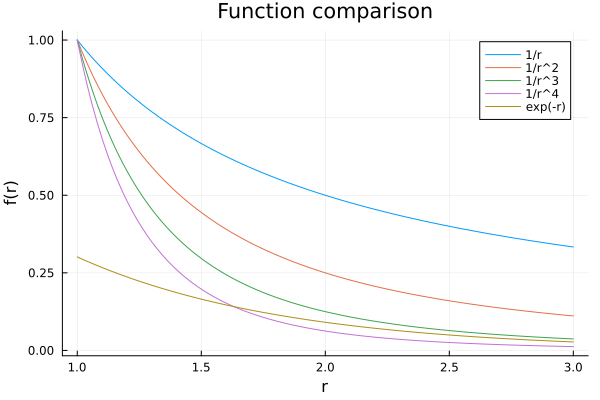

In [83]:
println(−64.414% (2*pi))
println(pi/2)
#plot function 1/(r^2) on a range between 0 and 2
using Plots
x = range(1, 3, length=100)
y_1 = 1 ./ (x)
y_2 = 1 ./ (x.^2)
y_3 = 1 ./ (x.^3)
y_4 = 1 ./ (x.^4)
y_5 = exp.(-1.2x)
plot(x,y_1, label = "1/r", xlabel = "r", ylabel = "f(r)", title = "Function comparison")
plot!(x,y_2, label = "1/r^2")
plot!(x,y_3, label = "1/r^3")
plot!(x,y_4, label = "1/r^4")
plot!(x,y_5, label = "exp(-r)")

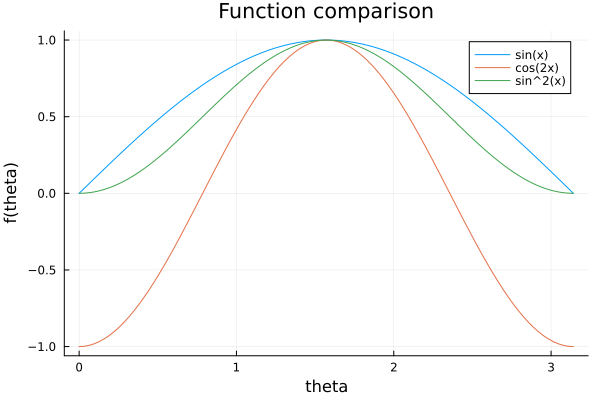

In [84]:
x = range(0, pi, length=100)
y_1 = sin.(x)
y_2 = -cos.(2*x)
y_3 = (sin.(x)).^2

plot(x,y_1, label = "sin(x)", xlabel = "theta", ylabel = "f(theta)", title = "Function comparison")
plot!(x,y_2, label = "cos(2x)")
plot!(x,y_3, label = "sin^2(x)")


In [5]:
plot_font = "Computer Modern"
pal = :gist_yarg
default(fontfamily=plot_font, framestyle=:box, linewidth=1, palette = pal, label = nothing, grid = true, bar_position = :dodge, bar_width=0.7)

UndefVarError: UndefVarError: `default` not defined

In [6]:
#boxplot n_param boxplot for all phi
using Plots
using StatsPlots

dss = []
phi_list = []
label_list = [0.05, 0.1, 0.2, 0.3, 0.4]
for (i,phi) in enumerate(["005","01","02","03","04"])
    df_phi = df_top3[df_top3[!,"phi"] .== phi,:]
    #println(df_phi)
    println(size(df_phi))
    ds_ = repeat([i], size(df_phi)[1])
    phi_= df_phi[!,"n_param"]
    println(length(phi_))
    push!(phi_list, phi_...)
    push!(dss, ds_...)
end    
println(dss)
println(phi_list)
#meanpointprops = Dict("marker"=>:*,"markersize"=>10,"markeredgecolor"=>:black, "markerfacecolor"=>:red)
#flierprops = Dict("marker"=>:*,"markersize"=>10,"markeredgecolor"=>:black, "markerfacecolor"=>:transparent)
#change fill of fliers to transparent
#flierprops["markerfacecolor"] = :transparent
pl = boxplot(dss, phi_list, legend = false, xlabel = "\$\\phi\$", ylabel = "Number of parameters",  bar_width=0.7, xticks=(1:5, label_list), palette = pal  )    # Makes the outlier border transparent)
plot(pl, size=(450,300))
savefig("finalStokes/n_param_boxplot.svg")

(93, 8)
93
(93, 8)
93
(88, 8)
88
(89, 8)
89
(82, 8)
82
Any[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

"/Users/juliareu/GitCode/flowingSR/finalStokes/n_param_boxplot.svg"

In [25]:
#create dictionary with boxplot style
pl = boxplot(dss, phi_list, legend = false, xlabel = "Phi", ylabel = "Number of parameters", title = "Number of parameters for different phi", bar_width=0.7, xticks=(1:5, label_list), 
    mediancolor=:red, fillcolor=:transparent, markerfacecolor=:red, fontfamily="Computer Modern",meanprops=meanpointprops)
plot(pl, size=(600,450))
savefig("finalStokes/n_param_boxplot_custom.png")

"/Users/juliareu/GitCode/flowingSR/finalStokes/n_param_boxplot_custom.png"

In [34]:
phi = "005"
eq005_1 = "(((sin(v2)^2.01336983688337)-(1.73353291730517/v1))/(v1*(v1-((-5.08160730796495/v1)/v1))))"
eq04_1 = "((-0.585260141224579-(cos((-2.03702204430019*v2))+(-0.345162840955615/v1)))*(-0.436217153914787+((0.995673331606845-((0.280419113108425/v1)/v1))/v1)))"
arbitrary_name = "Re0_phi$(phi)_n30_symmetricRotation_dimensionless_val"
data_matrix = Matrix(CSV.read("$(dataset_prefix)/$(arbitrary_name).csv", DataFrame))
data_matrix = data_matrix[:, [1,2,3,7,8]]
units = [u"m",  u"0", u"0", u"N", u"0"]

ops, data = Options(
    data_descript=data_descript(
            data_matrix;
            arbitrary_name = arbitrary_name,
            parts          = parts,
            #fit_weights    = fit_weights, 
            units          = units,
        ),
        general=general_params(
            n_gens                  = n_gen,
            pop_size                = 500,
            max_compl               = 35,
            pow_abs_param           = true,
            prevent_doubles         = 1e-7,
            t_lim                   = typemax(Float64),
            multithreadding         = true,
            always_correct_dims     = always_correct_dims,
            death_penalty_dims      = death_penalty_dims,
            always_drastic_simplify = false,
        ),
        selection=selection_params(
            hall_of_fame_objectives           = hall_of_fame_objectives,          # -> objectives for the hall_of_fame
            selection_objectives              = selection_objectives              # -> objectives for the Pareto-optimal selection part of selection
        ),
        fitting=fitting_params(
            early_stop_iter = 5,
            max_iter        = 30,
            pre_residual_processing = nothing,),

            binops          = (  +,   -,   *,   /,  ^),  # -> binary function set to choose from
            p_binops        = p_binops_,  # -> probabilites for selection of each binary functions (same length as provided binops) (dont need to add up to 1, adjusted accordingly)
            unaops          = (exp, log, sin, cos, abs, sqrt_abs, pow2, pow3),  # -> unary function set to choose from
            p_unaops        = p_unaops_,  # -> probability for each unary function
            illegal_dict = Dict(:sin => (sin, cos),
                            :cos => (sin, cos),
                            :abs => (abs,),
                            :exp => (exp, sqrt_abs), #log
                            :log => (log,), #exp
                            :pow2 => (log, sqrt_abs),
                            :sqrt_abs => (sqrt_abs,),
                            :pow3 => (pow3, pow2),
                            :^ => (^,),),

        mutation=mutation_params(;
            p_crossover        = 4.0,
            p_point            = 0.5,
            p_innergrow        = 0.0,
            p_insert           = 0.2,
            p_hoist            = 0.2,
            p_subtree          = 0.2,
            p_add_term         = 0.1,
            p_simplify         = 0.5,
            p_drastic_simplify = 0.5,
            p_correct_dims     = p_correct_dims,),
    );

y = data[end]
y = [y[i] for i in 1:30:length(y)-1]

eq = replace(eq005_1, r"--" => "+")
println(eq)
parsed = TiSR.string_to_node(eq, ops)
pred, valid = TiSR.eval_equation(parsed, data[1:end-2], ops)
pred = [sum(pred[i:i+29]) for i in 1:30:length(pred)-1]
residual = y .- pred
r2 = -TiSR.r_squared(y .- residual, y)


[452880, 452880](((sin(v2)^2.01336983688337)-(1.73353291730517/v1))/(v1*(v1-((-5.08160730796495/v1)/v1))))


┌ Warning: ^ is only valid for positive bases. Otherwise provide a pow(abs(x), y) function with its own drawbacks.
└ @ TiSR /Users/juliareu/GitCode/TiSR/src/options.jl:39


-0.7994210246346122

In [33]:
train_df = DataFrame(y_t = y, train_val = pred)

Row,y_t,train_val
,Float64,Float64
1,-0.0356468,-0.0398541
2,-0.0419812,-0.108813
3,0.0438311,-0.0316738
4,0.115502,0.147398
5,-0.440164,-0.57954
6,-0.224501,-0.176212
7,-0.332407,-0.429681
8,-0.0808105,-0.127388
9,-0.0982342,-0.117998


In [35]:
pred = DataFrame(y = y, pred_val = pred)

Row,y,pred_val
,Float64,Float64
1,0.057748,0.216131
2,-0.193769,-0.126893
3,-0.182922,-0.235218
4,-0.0581561,-0.0875413
5,-0.253635,-0.163636
6,0.00738606,-0.0451277
7,-0.115851,-0.262878
8,0.339676,0.0853956
9,-0.258625,-0.170748


In [36]:
using Plots
using StatsPlots

lim1 = minimum(y) - std(y)
lim2 = maximum(y) + std(y)
# Create the scatter plot
plot_font = "Computer Modern"
#set computer modern as font and 12 as font size
default(fontfamily=plot_font, framestyle=:box, linewidth=1, palette = pal, label = nothing, grid = true, bar_position = :dodge, bar_width=0.7, legend = false)
scatter(
    train_df[!,"y_t"], train_df[!,"train_val"],
    marker = (:circle, 2, :blue, 0.5),  # Marker size, color, and transparency
    linewidth = 0.5,  # Marker edge width
    color = :white,
    label = "train",
    xlabel = "Target y",
    ylabel = "Predicted y",
    legend = true,
    size=(400,270)
)

scatter!(
    pred[!,"y"], pred[!,"pred_val"],
    marker = (:circle, 2, :white, 0.5),  # Marker size, color, and transparency
    linewidth = 0.5,  # Marker edge width
    color = :blue,
    label = "test",

    legend = true,

)
# Add the regression line
plot!(
    [lim1, lim2], [lim1, lim2],
    linestyle = :dash,
    color = :red,
    linewidth = 2,
    alpha = 0.8,
    label = false
)
savefig("finalStokes/r2_plot_$(phi).pdf")


"/Users/juliareu/GitCode/flowingSR/finalStokes/r2_plot_005.pdf"